In [386]:
## for data
import pandas as pd
import numpy as np
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for statistical tests
import scipy
import statsmodels.formula.api as smf
## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model
from sklearn.ensemble import GradientBoostingClassifier
## for explainer
from lime import lime_tabular
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


## 1.1 Duration und alle Events

In [452]:
df_count = pd.read_pickle('SortedBySessions.pkl')

In [453]:
columns_of_interest = ["count_mouseover", "count_mouseout", "count_click", "count_blur", "count_focus", "count_keydown"]
df_count["total_counts"] = df_count[columns_of_interest].sum(axis=1)
df_count=df_count.drop(["count_mouseover", "count_mouseout", "count_click", "count_blur", "count_focus", "count_keydown", 'height', 'width', 'session'], axis=1)

df_count.head()

,duration,siteName,total_counts
0,136.831,1,159
1,33.249,1,3
2,230.175,1,130
3,20.563,0,19
4,17.076,0,24


In [454]:
X_count = df_count[['duration', 'total_counts']]
Y_count = df_count['siteName']

X_count = StandardScaler().fit_transform(X_count)

X_count_Train, X_count_Test, Y_count_Train, Y_count_Test = train_test_split(X_count, Y_count, test_size = 0.30, 
                                                    random_state = 101)

##### 1.2 Random Forest

In [480]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

# evaluate random forest algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

forest_model_count= RandomForestClassifier(n_estimators=1000, random_state=101)
forest_model_count.fit(X_count_Train,Y_count_Train)
y_count_forest_pred=forest_model_count.predict(X_count_Test)

In [481]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, matthews_corrcoef, confusion_matrix, roc_auc_score

def printEvaluation(Y_session_Test, y_session_pred): 
    print('Accuracy: %.3f' % accuracy_score(Y_session_Test, y_session_pred))
    print('Precision: %.3f' % precision_score(Y_session_Test, y_session_pred))
    print('Recall: %.3f' % recall_score(Y_session_Test, y_session_pred))
    print('Confusion Matrix:', confusion_matrix(Y_session_Test, y_session_pred))
    print('AUC Score: %.3f' % roc_auc_score(Y_session_Test, y_session_pred))
    print('MCC Score: %.3f' % matthews_corrcoef(Y_session_Test, y_session_pred))
    print('F1 Score: %.3f' % f1_score(Y_session_Test, y_session_pred))

printEvaluation(Y_count_Test, y_count_forest_pred)

Accuracy: 1.000
Precision: 1.000
Recall: 1.000
Confusion Matrix: [[15  0]
 [ 0 21]]
AUC Score: 1.000
MCC Score: 1.000
F1 Score: 1.000


### knn 

In [482]:
from sklearn.neighbors import KNeighborsClassifier

knn_model_count = KNeighborsClassifier(n_neighbors=3)
knn_model_count.fit(X_count_Train, Y_count_Train)
y_knn_count_pred = knn_model_count.predict(X_count_Test) 
printEvaluation(Y_count_Test, y_count_forest_pred)

Accuracy: 1.000
Precision: 1.000
Recall: 1.000
Confusion Matrix: [[15  0]
 [ 0 21]]
AUC Score: 1.000
MCC Score: 1.000
F1 Score: 1.000


### Logistic Regression


In [483]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg_model_count = LogisticRegression(random_state=16)

# fit the model with data
logreg_model_count.fit(X_count_Train, Y_count_Train)
y_logreg_pred_count = logreg_model_count.predict(X_count_Test)
printEvaluation(Y_count_Test, y_logreg_pred_count)

Accuracy: 0.833
Precision: 1.000
Recall: 0.714
Confusion Matrix: [[15  0]
 [ 6 15]]
AUC Score: 0.857
MCC Score: 0.714
F1 Score: 0.833


#### SVM

In [ ]:
from sklearn import svm
#Create a svm Classifier
svm_model_count = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
svm_model_count.fit(X_count_Train, Y_count_Train)

#Predict the response for test dataset
y_svm_pred_count = svm_model_count.predict(X_count_Test)

# Sessions

In [457]:
df_sessions = pd.read_pickle('SortedBySessions.pkl')

In [458]:
df_sessions.head()

,session,count_mouseover,count_mouseout,count_click,count_blur,count_focus,count_keydown,duration,height,width,siteName
0,515,32,32,14,26,28,27,136.831,1312.0,1479.0,1
1,519,1,0,0,1,1,0,33.249,669.0,390.0,1
2,524,42,42,8,17,16,5,230.175,878.0,1920.0,1
3,528,4,3,0,6,6,0,20.563,1217.0,1440.0,0
4,554,6,6,0,6,6,0,17.076,715.0,414.0,0


In [459]:
X_session = df_sessions[['count_mouseover','count_mouseout','count_focus','count_blur', 'count_click','count_keydown', 'duration']]
Y_session = df_sessions['siteName']

X_session = StandardScaler().fit_transform(X_session)

X_session_Train, X_session_Test, Y_session_Train, Y_session_Test = train_test_split(X_session, Y_session, test_size = 0.30, 
                                                    random_state = 101)

#### Random Forest Session

Accuracy: 0.8974358974358975

With Hyperparameter: Accuracy: 0.9230769230769231


In [460]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

# evaluate random forest algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

#Create a Gaussian Classifier
forest_model=RandomForestClassifier(n_estimators=1000, random_state=101)

#Train the model using the training sets y_pred=clf.predict(X_test)
forest_model.fit(X_session_Train,Y_session_Train)

y_session_pred=forest_model.predict(X_session_Test)

In [461]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, matthews_corrcoef, roc_auc_score
print('Accuracy: %.3f' % accuracy_score(Y_session_Test, y_session_pred))
print('Precision: %.3f' % precision_score(Y_session_Test, y_session_pred))
print('Recall: %.3f' % recall_score(Y_session_Test, y_session_pred))
print('Confusion Matrix:', confusion_matrix(Y_session_Test, y_session_pred))
print('AUC Score: %.3f' % roc_auc_score(Y_session_Test, y_session_pred))
print('MCC Score: %.3f' % matthews_corrcoef(Y_session_Test, y_session_pred))
print('F1 Score: %.3f' % f1_score(Y_session_Test, y_session_pred))


Accuracy: 0.972
Precision: 1.000
Recall: 0.952
Confusion Matrix: [[15  0]
 [ 1 20]]
AUC Score: 0.976
MCC Score: 0.945
F1 Score: 0.976


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=3)

knn_model.fit(X_session_Train, Y_session_Train)

y_knn_pred = knn_model.predict(X_session_Test) # 0:Overcast, 2:Mild

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, matthews_corrcoef
print('Accuracy: %.3f' % accuracy_score(Y_session_Test, y_knn_pred))
print('Precision: %.3f' % precision_score(Y_session_Test, y_knn_pred))
print('Recall: %.3f' % recall_score(Y_session_Test, y_knn_pred))
print('Confusion Matrix:', confusion_matrix(Y_session_Test, y_knn_pred))
print('AUC Score: %.3f' % metrics.roc_auc_score(Y_session_Test, y_knn_pred))
print('MCC Score: %.3f' % matthews_corrcoef(Y_session_Test, y_knn_pred))
print('F1 Score: %.3f' % f1_score(Y_session_Test, y_knn_pred))

Accuracy: 0.750
Precision: 0.875
Recall: 0.667
Confusion Matrix: [[13  2]
 [ 7 14]]
AUC Score: 0.767
MCC Score: 0.529
F1 Score: 0.757


/Users/ingaglotzbach/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


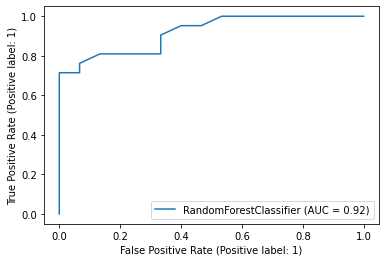

In [ ]:
metrics.plot_roc_curve(forest_model, X_session_Test, Y_session_Test)
plt.show()

#### Improve Random Forest with Hyperparameter

In [ ]:
rfc_model = RandomForestClassifier()

parameters = {
    "n_estimators":[5,10,50,100,250],
    "max_depth":[2,4,8,16,32,None]
    
}

In [ ]:
from sklearn.model_selection import GridSearchCV
cv_grid = GridSearchCV(rfc_model,parameters,cv=5)
cv_grid.fit(X_session, Y_session.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 4, 8, 16, 32, None],
                         'n_estimators': [5, 10, 50, 100, 250]})

In [ ]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [ ]:
display(cv_grid)

Best parameters are: {'max_depth': 8, 'n_estimators': 250}


0.933 + or -0.033 for the {'max_depth': 2, 'n_estimators': 5}
0.908 + or -0.031 for the {'max_depth': 2, 'n_estimators': 10}
0.933 + or -0.02 for the {'max_depth': 2, 'n_estimators': 50}
0.908 + or -0.017 for the {'max_depth': 2, 'n_estimators': 100}
0.908 + or -0.017 for the {'max_depth': 2, 'n_estimators': 250}
0.917 + or -0.046 for the {'max_depth': 4, 'n_estimators': 5}
0.925 + or -0.017 for the {'max_depth': 4, 'n_estimators': 10}
0.942 + or -0.02 for the {'max_depth': 4, 'n_estimators': 50}
0.942 + or -0.02 for the {'max_depth': 4, 'n_estimators': 100}
0.95 + or -0.017 for the {'max_depth': 4, 'n_estimators': 250}
0.925 + or -0.076 for the {'max_depth': 8, 'n_estimators': 5}
0.958 + or -0.026 for the {'max_depth': 8, 'n_estimators': 10}
0.958 + or -0.026 for the {'max_depth': 8, 'n_estimators': 50}
0.95 + or -0.017 for the {'max_depth': 8, 'n_estimators': 100}
0.967 + or -0.017 for the {'max_depth': 8, 'n_estimators': 2

#### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=3)

knn_model.fit(X_session_Train, Y_session_Train)

y_knn_pred = knn_model.predict(X_session_Test) # 0:Overcast, 2:Mild


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, matthews_corrcoef
print('Accuracy: %.3f' % accuracy_score(Y_session_Test, y_knn_pred))
print('Precision: %.3f' % precision_score(Y_session_Test, y_knn_pred))
print('Recall: %.3f' % recall_score(Y_session_Test, y_knn_pred))
print('Confusion Matrix:', confusion_matrix(Y_session_Test, y_knn_pred))
print('AUC Score: %.3f' % metrics.roc_auc_score(Y_session_Test, y_knn_pred))
print('MCC Score: %.3f' % matthews_corrcoef(Y_session_Test, y_knn_pred))
print('F1 Score: %.3f' % f1_score(Y_session_Test, y_knn_pred))

Accuracy: 0.778
Precision: 0.810
Recall: 0.810
Confusion Matrix: [[11  4]
 [ 4 17]]
AUC Score: 0.771
MCC Score: 0.543
F1 Score: 0.810


Robust Scaling to improve KNN --> Accuracy: 0.8717948717948718

MinMax Scaling to improve KNN --> Accuracy: 0.8461538461538461

In [ ]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_session_robust = df_sessions[['count_mouseover', 'count_mouseout','count_click','count_blur','count_keydown','count_focus','duration']]
Y_session_robust = df_sessions['siteName']

X_session_robust = scaler.fit_transform(X_session_robust)

X_session_robust_Train, X_session_robust_Test, Y_session_robust_Train, Y_session_robust_Test = train_test_split(X_session_robust, Y_session_robust, test_size = 0.30, random_state = 101)

#Create KNN Object
knn_robust = KNeighborsClassifier()

knn_robust.fit(X_session_robust_Train, Y_session_robust_Train)

y_knn_pred_robust = knn_robust.predict(X_session_robust_Test)

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, matthews_corrcoef
print('Accuracy: %.3f' % accuracy_score(Y_session_Test, y_knn_pred_robust))
print('Precision: %.3f' % precision_score(Y_session_Test, y_knn_pred_robust))
print('Recall: %.3f' % recall_score(Y_session_Test, y_knn_pred_robust))
print('Confusion Matrix:', confusion_matrix(Y_session_Test, y_knn_pred_robust))
print('AUC Score: %.3f' % metrics.roc_auc_score(Y_session_Test, y_knn_pred_robust))
print('MCC Score: %.3f' % matthews_corrcoef(Y_session_Test, y_knn_pred_robust))
print('F1 Score: %.3f' % f1_score(Y_session_Test, y_knn_pred_robust))

Accuracy: 0.972
Precision: 1.000
Recall: 0.952
Confusion Matrix: [[15  0]
 [ 1 20]]
AUC Score: 0.976
MCC Score: 0.945
F1 Score: 0.976


Use Hyperparameter

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]

hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

hyper_model = GridSearchCV(knn_model, hyperparameters, cv=10)
best_model = hyper_model.fit(X_session_Train,Y_session_Train)

print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])


Best leaf_size: 1
Best p: 2
Best n_neighbors: 5


In [ ]:
y_hyper_pred = best_model.predict(X_session_Test)
print("Accuracy:",metrics.accuracy_score(Y_session_Test, y_hyper_pred))

Accuracy: 1.0


#### Linear Discriminat Analysis

In [ ]:
from sklearn.datasets import make_classification
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_session_Train, Y_session_Train)

LinearDiscriminantAnalysis()

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(lda_model, X_session, Y_session, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores))   


0.8444444444444443


#### Logistic Regression

In [ ]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg_model = LogisticRegression(random_state=16)

# fit the model with data
logreg_model.fit(X_session_Train, Y_session_Train)

y_logreg_pred = logreg_model.predict(X_session_Test)

In [ ]:
print('Accuracy: %.3f' % accuracy_score(Y_session_Test, y_logreg_pred))
print('Precision: %.3f' % precision_score(Y_session_Test, y_logreg_pred))
print('Recall: %.3f' % recall_score(Y_session_Test, y_logreg_pred))
print('Confusion Matrix:', confusion_matrix(Y_session_Test, y_logreg_pred))
print('AUC Score: %.3f' % metrics.roc_auc_score(Y_session_Test, y_logreg_pred))
print('MCC Score: %.3f' % matthews_corrcoef(Y_session_Test, y_logreg_pred))
print('F1 Score: %.3f' % f1_score(Y_session_Test, y_logreg_pred))

Accuracy: 0.861
Precision: 1.000
Recall: 0.762
Confusion Matrix: [[15  0]
 [ 5 16]]
AUC Score: 0.881
MCC Score: 0.756
F1 Score: 0.865


#### Naive Bayes

In [ ]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb_model = GaussianNB()

#Train the model using the training sets
gnb_model.fit(X_session_Train, Y_session_Train)

#Predict the response for test dataset
y_gnb_pred = gnb_model.predict(X_session_Test)

In [ ]:
print('Accuracy: %.3f' % accuracy_score(Y_session_Test, y_gnb_pred))
print('Precision: %.3f' % precision_score(Y_session_Test, y_gnb_pred))
print('Recall: %.3f' % recall_score(Y_session_Test, y_gnb_pred))
print('Confusion Matrix:', confusion_matrix(Y_session_Test, y_gnb_pred))
print('AUC Score: %.3f' % metrics.roc_auc_score(Y_session_Test, y_gnb_pred))
print('MCC Score: %.3f' % matthews_corrcoef(Y_session_Test, y_gnb_pred))
print('F1 Score: %.3f' % f1_score(Y_session_Test, y_gnb_pred))

Accuracy: 0.861
Precision: 0.944
Recall: 0.810
Confusion Matrix: [[14  1]
 [ 4 17]]
AUC Score: 0.871
MCC Score: 0.732
F1 Score: 0.872


#### SVM

In [ ]:
from sklearn import svm
#Create a svm Classifier
svm_model = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
svm_model.fit(X_session_Train, Y_session_Train)

#Predict the response for test dataset
y_svm_pred = svm_model.predict(X_session_Test)

In [ ]:
print('Accuracy: %.3f' % accuracy_score(Y_session_Test, y_svm_pred))
print('Precision: %.3f' % precision_score(Y_session_Test, y_svm_pred))
print('Recall: %.3f' % recall_score(Y_session_Test, y_svm_pred))
print('Confusion Matrix:', confusion_matrix(Y_session_Test, y_svm_pred))
print('AUC Score: %.3f' % metrics.roc_auc_score(Y_session_Test, y_svm_pred))
print('MCC Score: %.3f' % matthews_corrcoef(Y_session_Test, y_svm_pred))
print('F1 Score: %.3f' % f1_score(Y_session_Test, y_svm_pred))

Accuracy: 0.861
Precision: 1.000
Recall: 0.762
Confusion Matrix: [[15  0]
 [ 5 16]]
AUC Score: 0.881
MCC Score: 0.756
F1 Score: 0.865


#### Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gradient_booster_model = GradientBoostingClassifier(learning_rate=0.1)
gradient_booster_model.fit(X_session_Train,Y_session_Train)

y_gradient_pred = gradient_booster_model.predict(X_session_Test)


In [ ]:
print('Accuracy: %.3f' % accuracy_score(Y_session_Test, y_gradient_pred))
print('Precision: %.3f' % precision_score(Y_session_Test, y_gradient_pred))
print('Recall: %.3f' % recall_score(Y_session_Test, y_gradient_pred))
print('Confusion Matrix:', confusion_matrix(Y_session_Test, y_gradient_pred))
print('AUC Score: %.3f' % metrics.roc_auc_score(Y_session_Test, y_gradient_pred))
print('MCC Score: %.3f' % matthews_corrcoef(Y_session_Test, y_gradient_pred))
print('F1 Score: %.3f' % f1_score(Y_session_Test, y_gradient_pred))

Accuracy: 0.944
Precision: 0.952
Recall: 0.952
Confusion Matrix: [[14  1]
 [ 1 20]]
AUC Score: 0.943
MCC Score: 0.886
F1 Score: 0.952


#### ANN / Multi-Layer-Perceptron
Batch-Size: 32 loss: 0.6364 - accuracy: 0.7333

Batch-Size: 16 loss: 0.5102 - accuracy: 0.8444

Batch-Size: 8  loss: 0.3590 - accuracy: 0.8556

Batch-Size: 32 and epochs: 100 loss: 0.6783 - accuracy: 0.7333


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
import tensorflow as tf

In [ ]:
ann_model = tf.keras.models.Sequential()
ann_model.add(tf.keras.layers.Dense(units=4,activation="relu"))
ann_model.add(tf.keras.layers.Dense(units=4,activation="relu"))
ann_model.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))
ann_model.compile(optimizer="adam",loss="mean_squared_error",metrics=['accuracy'])
ann_model.fit(X_session_Train,Y_session_Train,batch_size=32,epochs = 50)

y_ann_pred=ann_model.predict(X_session_Test)

Epoch 1/50
3/3 [==============================] - 1s 3ms/step - loss: 0.2301 - accuracy: 0.8333
Epoch 2/50
3/3 [==============================] - 0s 2ms/step - loss: 0.2279 - accuracy: 0.8333
Epoch 3/50
3/3 [==============================] - 0s 2ms/step - loss: 0.2257 - accuracy: 0.8571
Epoch 4/50
3/3 [==============================] - 0s 2ms/step - loss: 0.2238 - accuracy: 0.8929
Epoch 5/50
3/3 [==============================] - 0s 2ms/step - loss: 0.2219 - accuracy: 0.8929
Epoch 6/50
3/3 [==============================] - 0s 3ms/step - loss: 0.2203 - accuracy: 0.8929
Epoch 7/50
3/3 [==============================] - 0s 2ms/step - loss: 0.2187 - accuracy: 0.8810
Epoch 8/50
3/3 [==============================] - 0s 4ms/step - loss: 0.2173 - accuracy: 0.8810
Epoch 9/50
3/3 [==============================] - 0s 3ms/step - loss: 0.2159 - accuracy: 0.8810
Epoch 10/50
3/3 [==============================] - 0s 2ms/step - loss: 0.2144 - accuracy: 0.8810
Epoch 11/50
3/3 [======================

# Sessions only mousedynamics

In [ ]:
df_mouse = pd.read_pickle('CleanedDataWithIds.pkl') 

In [ ]:
df_mouse = df_mouse.drop(['date', 'elementId', 'height', 'width' ], axis=1)
df_mouse.head()

,timeStamp,type,siteName,clientX,clientY,session
339,824.3,mouseover,0,673.000000,363.000000,243
340,858.3,mouseout,0,772.000000,333.000000,243
341,2005.3,mouseover,0,796.000000,266.000000,243
342,2296.5,focus,0,526.105402,333.262187,243
343,2875.3,mouseover,0,995.000000,264.000000,243


In [ ]:
df_mouseover = df_mouse.loc[df_mouse['type']=='mouseover']
df_mouseout = df_mouse.loc[df_mouse['type']=='mouseout']
df_mouse = pd.concat([df_mouseover, df_mouseout])

df_mouse['type'] = df_mouse['type'].replace('mouseover', 2)
df_mouse['type'] = df_mouse['type'].replace('mouseout', 3)

df_mouse.head()

,timeStamp,type,siteName,clientX,clientY,session
339,824.3,2,0,673.0,363.0,243
341,2005.3,2,0,796.0,266.0,243
343,2875.3,2,0,995.0,264.0,243
346,3258.3,2,0,880.0,267.0,243
359,18308.3,2,0,771.0,342.0,243


In [ ]:
X_mouse = df_mouse[['timeStamp', 'type','clientX', 'clientY']]
Y_mouse = df_mouse['siteName']

X_mouse = StandardScaler().fit_transform(X_mouse)

X_mouse_Train, X_mouse_Test, Y_mouse_Train, Y_mouse_Test = train_test_split(X_mouse, Y_mouse, test_size = 0.30, 
                                                    random_state = 101)

In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
forest_model_mouse=RandomForestClassifier(n_estimators=250)

#Train the model using the training sets y_pred=clf.predict(X_test)
forest_model_mouse.fit(X_mouse_Train,Y_mouse_Train)

y_mouse_pred=forest_model_mouse.predict(X_mouse_Test)

In [ ]:
print('Accuracy: %.3f' % accuracy_score(Y_mouse_Test, y_mouse_pred))
print('Precision: %.3f' % precision_score(Y_mouse_Test, y_mouse_pred))
print('Recall: %.3f' % recall_score(Y_mouse_Test, y_mouse_pred))
print('Confusion Matrix:', confusion_matrix(Y_mouse_Test, y_mouse_pred))
print('AUC Score: %.3f' % metrics.roc_auc_score(Y_mouse_Test, y_mouse_pred))
print('MCC Score: %.3f' % matthews_corrcoef(Y_mouse_Test, y_mouse_pred))
print('F1 Score: %.3f' % f1_score(Y_mouse_Test, y_mouse_pred))

Accuracy: 0.925
Precision: 0.955
Recall: 0.954
Confusion Matrix: [[180  46]
 [ 47 971]]
AUC Score: 0.875
MCC Score: 0.749
F1 Score: 0.954


# CNN Sequential Data Model

In [ ]:
df_seq = pd.read_pickle('CleanedDataWithIds.pkl') 
df_seq['date'] = df_seq['date'].astype('datetime64[ns]')

In [ ]:
df_seq= df_seq.sort_values(by=['date', 'session'], ascending=[True, False])
df_seq.head()

,elementId,timeStamp,type,siteName,date,clientX,clientY,session,height,width
339,inputPet,824.3,mouseover,0,2022-10-17 13:35:24.171,673.000000,363.000000,243,944.0,1920.0
340,inputPet,858.3,mouseout,0,2022-10-17 13:35:24.205,772.000000,333.000000,243,944.0,1920.0
341,inputCountry,2005.3,mouseover,0,2022-10-17 13:35:25.361,796.000000,266.000000,243,944.0,1920.0
342,inputCountry,2296.5,focus,0,2022-10-17 13:35:25.652,526.105402,333.262187,243,944.0,1920.0
344,inputCountry,2875.3,mouseout,0,2022-10-17 13:35:26.229,995.000000,264.000000,243,944.0,1920.0


In [ ]:
df_seq=df_seq.drop(['elementId', 'date'], axis=1)

In [ ]:
df_seq.head()

,timeStamp,type,siteName,clientX,clientY,session,height,width
339,824.3,mouseover,0,673.000000,363.000000,243,944.0,1920.0
340,858.3,mouseout,0,772.000000,333.000000,243,944.0,1920.0
341,2005.3,mouseover,0,796.000000,266.000000,243,944.0,1920.0
342,2296.5,focus,0,526.105402,333.262187,243,944.0,1920.0
344,2875.3,mouseout,0,995.000000,264.000000,243,944.0,1920.0


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

df_encoded = df_seq.sort_values(by=['session', 'timeStamp'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense

le = LabelEncoder()
df_encoded['siteName'] = le.fit_transform(df_encoded['siteName'])


In [ ]:
df_encoded = pd.get_dummies(df_encoded, columns=['type'])

In [ ]:
df_encoded.head()

,timeStamp,siteName,clientX,clientY,session,height,width,type_blur,type_click,type_focus,type_keydown,type_mouseout,type_mouseover
18052,587.0,1,1389.0,465.0,102,1279.0,3440.0,0,0,0,0,0,1
18051,605.0,1,1385.0,428.0,102,1279.0,3440.0,0,0,0,0,1,0
18054,704.0,1,1395.0,316.0,102,1279.0,3440.0,0,0,0,0,0,1
18053,755.0,1,1416.0,285.0,102,1279.0,3440.0,0,0,0,0,1,0
18055,1057.0,1,1416.0,286.0,102,1279.0,3440.0,0,0,0,0,0,1


In [ ]:
X = df_encoded.drop(['siteName'], axis=1)
y = df_encoded['siteName']

In [ ]:
from keras.optimizers import Adam
from sklearn.model_selection import KFold
# define and fit model
from keras import regularizers

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# reshape data for LSTM
X_train = np.reshape(X_train.values, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test.values, (X_test.shape[0], 1, X_test.shape[1]))


model = Sequential()
model.add(LSTM(64, return_sequences=True, kernel_regularizer=regularizers.l2(0.01), recurrent_regularizer=regularizers.l2(0.01), bias_regularizer=regularizers.l2(0.01), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.5))
model.add(LSTM(64, return_sequences=True, kernel_regularizer=regularizers.l2(0.01), recurrent_regularizer=regularizers.l2(0.01), bias_regularizer=regularizers.l2(0.01), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.5))
model.add(Dense(1, activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model with increased number of epochs
model.fit(X_train, y_train, epochs=20, shuffle=False)

Epoch 1/20
222/222 [==============================] - 4s 4ms/step - loss: 4.2238 - accuracy: 0.8198
Epoch 2/20
222/222 [==============================] - 1s 3ms/step - loss: 3.3692 - accuracy: 0.8198
Epoch 3/20
222/222 [==============================] - 1s 3ms/step - loss: 3.0990 - accuracy: 0.8198
Epoch 4/20
222/222 [==============================] - 1s 3ms/step - loss: 2.9312 - accuracy: 0.8198
Epoch 5/20
222/222 [==============================] - 1s 3ms/step - loss: 2.8348 - accuracy: 0.8198
Epoch 6/20
222/222 [==============================] - 1s 3ms/step - loss: 2.7845 - accuracy: 0.8198
Epoch 7/20
222/222 [==============================] - 1s 3ms/step - loss: 2.7612 - accuracy: 0.8198
Epoch 8/20
222/222 [==============================] - 1s 3ms/step - loss: 2.7518 - accuracy: 0.8198
Epoch 9/20
222/222 [==============================] - 1s 3ms/step - loss: 2.7486 - accuracy: 0.8198
Epoch 10/20
222/222 [==============================] - 1s 3ms/step - loss: 2.7476 - accuracy: 0.8198

In [ ]:
# evaluate the model
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


Test loss: 0.0016635657520964742
Test accuracy: 0.8327683806419373


In [ ]:
df_encoded.head()

,timeStamp,siteName,clientX,clientY,session,height,width,type_blur,type_click,type_focus,type_keydown,type_mouseout,type_mouseover
18052,587.0,1,1389.0,465.0,102,1279.0,3440.0,0,0,0,0,0,1
18051,605.0,1,1385.0,428.0,102,1279.0,3440.0,0,0,0,0,1,0
18054,704.0,1,1395.0,316.0,102,1279.0,3440.0,0,0,0,0,0,1
18053,755.0,1,1416.0,285.0,102,1279.0,3440.0,0,0,0,0,1,0
18055,1057.0,1,1416.0,286.0,102,1279.0,3440.0,0,0,0,0,0,1


In [ ]:
# Eingabevektoren in ein Array umwandeln
X = df_encoded.drop(['siteName'], axis=1).values
y = df_encoded['siteName'].values

# Daten in train und test sets splitten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# reshape data for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)



ValueError: Must pass 2-d input. shape=(7077, 1, 12)

# CNN


In [ ]:
from keras.layers import Conv1D, MaxPooling1D, Flatten, Embedding

model2 = Sequential()
model2.add(Embedding(input_dim=X_train.shape[1], output_dim=12, input_length=1))
model2.add(Flatten())
model2.add(Dense(32, activation='relu'))
model2.add(Dense(2, activation='sigmoid'))
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model2.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10


ValueError: in user code:

    File "/Users/ingaglotzbach/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "/Users/ingaglotzbach/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/ingaglotzbach/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "/Users/ingaglotzbach/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "/Users/ingaglotzbach/opt/anaconda3/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/ingaglotzbach/opt/anaconda3/lib/python3.8/site-packages/keras/engine/input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_109" "                 f"(type Sequential).
    
    Input 0 of layer "dense_142" is incompatible with the layer: expected axis -1 of input shape to have value 12, but received input with shape (None, 144)
    
    Call arguments received by layer "sequential_109" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None, 12), dtype=float32)
      • training=True
      • mask=None


### LSTM

In [ ]:
X_time_series = df_seq[['timeStamp', 'session']]
Y_time_series = df_seq['siteName']

X_time_series = StandardScaler().fit_transform(X_time_series)

X_time_Train, X_time_Test, Y_time_Train, Y_time_Test = train_test_split(X_time_series, Y_time_series, test_size = 0.30, 
                                                    random_state = 101)

In [ ]:
import tensorflow as tf

# Definition der Eingabeschicht
inputs = tf.keras.layers.Input(shape=(None,))  # Die Eingabeschicht erwartet sequentielle Daten mit variabler Länge

# Fügen Sie hier weitere Schichten hinzu, z.B. Embedding- oder Convolution-Schichten

# Definition der RNN-Schicht
rnn = tf.keras.layers.LSTM(64)(inputs)  # Verwenden Sie eine LSTM-Schicht mit 64 Neuronen

# Definition der Ausgabeschicht
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(rnn)  # Fügen Sie eine Dense-Schicht mit einer sigmoid-Aktivierungsfunktion hinzu

# Erstellen Sie das Modell mit den definierten Schichten
rnn_model = tf.keras.Model(inputs=inputs, outputs=outputs)

# Kompilieren Sie das Modell mit einer Loss-Funktion und einem Optimierer
rnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Trainieren Sie das Modell anhand Ihrer Trainingsdaten
rnn_model.fit(X_time_Train, Y_time_Train, epochs=10)

# Verwenden Sie das Modell, um Vorhersagen anhand Ihrer Testdaten zu treffen
predictions = rnn_model.predict(X_time_Test)

ValueError: Input 0 of layer "lstm" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, None)

## Session by Focus/Blur

In [429]:
df_focus = pd.read_pickle('CleanedDataWithIds.pkl') 
df_focus = df_focus.drop([ 'height', 'width', 'clientX', 'clientY', 'timeStamp' ], axis=1)
df_focus= df_focus.sort_values(by=['date', 'session'], ascending=[True, False])
df_focus = df_focus.loc[(df_focus['type'] == 'focus') | (df_focus['type'] == 'blur')]
df_focus = df_focus.loc[(df_focus['elementId'] != 'window')]

In [430]:
helloo = df_focus['type'].value_counts()

helloo.head()

focus    1205
blur     1194
Name: type, dtype: int64

In [428]:
hello = df_focus.loc[(df_focus['siteName'] == 1)]
hello = hello['type'].value_counts()
hello.head()

focus    833
blur     822
Name: type, dtype: int64

In [423]:
hello2 = df_focus.loc[(df_focus['siteName'] == 0) ]
hello2 = hello2['type'].value_counts()
hello2.head()

focus    372
blur     372
Name: type, dtype: int64

In [ ]:
df_focus['date'] = pd.to_datetime(df_focus['date'])
df_focus['duration'] = df_focus.groupby(['elementId', 'session'])['date'].diff().dt.total_seconds()
df_result = df_focus.groupby(['siteName', 'session', 'type'])['duration'].agg(['sum', 'size']).reset_index()
df_result = df_result.groupby(['siteName', 'session']).sum()
df_result = df_result.rename(columns={'sum': 'duration', 'size': 'event_count focus/blur'})
df_result = df_result[['event_count focus/blur', 'duration']]

df_result.head()

<ipython-input-378-989b91c179d3>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_result = df_result.groupby(['siteName', 'session']).sum()


event_count focus/blur  duration
siteName session                                  
0        110                          14    45.536
         116                           2     3.896
         120                           6     7.034
         127                          14    22.744
         138                          12    38.160

In [ ]:
#62 focus und blur Events in Input Feldern auf der einfachen Seite 
#36 
df_result = df_result.reset_index()

## Sessions by mouseover

In [ ]:
df_mouse = pd.read_pickle('CleanedDataWithIds.pkl') 
df_mouse = df_mouse.drop([ 'height', 'width', 'clientX', 'clientY', 'timeStamp' ], axis=1)
df_mouse = df_mouse.sort_values(by=['date', 'session'], ascending=[True, False])
df_mouse = df_mouse.loc[(df_mouse['type'] == 'mouseover') | (df_mouse['type'] == 'mouseout')]
df_mouse = df_mouse.loc[(df_mouse['elementId'] != 'window')]

In [ ]:
df_mouse['date'] = pd.to_datetime(df_mouse['date'])
df_mouse['duration'] = df_mouse.groupby(['elementId', 'session'])['date'].diff().dt.total_seconds()
df_result_mouse = df_mouse.groupby(['siteName', 'session', 'type'])['duration'].agg(['sum', 'size']).reset_index()
df_result_mouse = df_result_mouse.groupby(['siteName', 'session']).sum()
df_result_mouse = df_result_mouse.rename(columns={'sum': 'duration', 'size': 'event_count mouseover/mouseout'})
df_result_mouse = df_result_mouse[['event_count mouseover/mouseout', 'duration']]

df_result_mouse = df_result_mouse.reset_index()

<ipython-input-381-6e4a7f66efa7>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_result_mouse = df_result_mouse.groupby(['siteName', 'session']).sum()


In [395]:
X_mouse = df_result_mouse[['event_count mouseover/mouseout', 'duration']]
Y_mouse = df_result_mouse['siteName']

X_mouse = StandardScaler().fit_transform(X_mouse)

X_mouse_Train, X_mouse_Test, Y_mouse_Train, Y_mouse_Test = train_test_split(X_mouse, Y_mouse, test_size = 0.30, 
                                                    random_state = 101)

In [ ]:
X_focus = df_result[['event_count focus/blur', 'duration']]
Y_focus = df_result['siteName']

X_focus = StandardScaler().fit_transform(X_focus)

X_focus_Train, X_focus_Test, Y_focus_Train, Y_focus_Test = train_test_split(X_focus, Y_focus, test_size = 0.30, 
                                                    random_state = 101)

In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

# evaluate random forest algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

#Create a Gaussian Classifier
forest_focus_model=RandomForestClassifier(n_estimators=1000, random_state=101)

#Train the model using the training sets y_pred=clf.predict(X_test)
forest_focus_model.fit(X_focus_Train,Y_focus_Train)

y_focus_pred=forest_focus_model.predict(X_focus_Test)

In [393]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, matthews_corrcoef, confusion_matrix, roc_auc_score
print('Accuracy: %.3f' % accuracy_score(Y_focus_Test, y_focus_pred))
print('Precision: %.3f' % precision_score(Y_focus_Test, y_focus_pred))
print('Recall: %.3f' % recall_score(Y_focus_Test, y_focus_pred))
print('Confusion Matrix:', confusion_matrix(Y_focus_Test, y_focus_pred))
print('AUC Score: %.3f' % roc_auc_score(Y_focus_Test, y_focus_pred))
print('MCC Score: %.3f' % matthews_corrcoef(Y_focus_Test, y_focus_pred))
print('F1 Score: %.3f' % f1_score(Y_focus_Test, y_focus_pred))

Accuracy: 0.865
Precision: 0.850
Recall: 0.895
Confusion Matrix: [[15  3]
 [ 2 17]]
AUC Score: 0.864
MCC Score: 0.730
F1 Score: 0.872


In [396]:
#Create a Gaussian Classifier
forest_mouse_model=RandomForestClassifier(n_estimators=1000, random_state=101)

#Train the model using the training sets y_pred=clf.predict(X_test)
forest_mouse_model.fit(X_mouse_Train,Y_mouse_Train)

y_mouse_pred=forest_mouse_model.predict(X_mouse_Test)

In [397]:
print('Accuracy: %.3f' % accuracy_score(Y_mouse_Test, y_mouse_pred))
print('Precision: %.3f' % precision_score(Y_mouse_Test, y_mouse_pred))
print('Recall: %.3f' % recall_score(Y_mouse_Test, y_mouse_pred))
print('Confusion Matrix:', confusion_matrix(Y_mouse_Test, y_mouse_pred))
print('AUC Score: %.3f' % roc_auc_score(Y_mouse_Test, y_mouse_pred))
print('MCC Score: %.3f' % matthews_corrcoef(Y_mouse_Test, y_mouse_pred))
print('F1 Score: %.3f' % f1_score(Y_mouse_Test, y_mouse_pred))

Accuracy: 0.800
Precision: 0.773
Recall: 0.850
Confusion Matrix: [[15  5]
 [ 3 17]]
AUC Score: 0.800
MCC Score: 0.603
F1 Score: 0.810
